# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [688]:
import math

def find_polar_angle(p1, p2, p3):
    angle = math.atan2(p1.y - p2.y, p1.x - p2.x) - math.atan2(p3.y - p2.y, p3.x - p2.x)
    #return the negative angle if in third of fourth quadrant
    return angle if angle < math.pi else angle - 2 * math.pi

def get_distance(p1, p2):
    return math.sqrt((p2.x - p1.x) ** 2 + (p2.y - p1.y) ** 2)


def jarvismarch(inputSet):
    '''
    Returns the list of points that lie on the convex hull (jarvis march algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''
    
    outputSet = []

    # start with the leftmost element 
    start = min(inputSet, key=lambda p: (p.x, p.y))

    outputSet.append(start)

    on_hull = start

    # add 1 to y coordinate have initial angle of pi/2
    prev_point = Point(start.x, start.y + 1)

    # set to true once we return to the start point
    looped = False

    while not looped:

        # store the smallest clockwise angle
        min_angle = float("inf")

        next_point = None        

        for point in inputSet:

            if point == on_hull:
                continue
                
            angle = find_polar_angle(prev_point, on_hull, point)

            if next_point is None or angle < min_angle:
                min_angle = angle
                next_point = point
            
            # if points are colinear, take the one further away
            elif angle == min_angle:
                if get_distance(on_hull, point) > get_distance(on_hull, next_point):
                    next_point = point
            
        if next_point == start:
            looped = True
        else:
            prev_point = on_hull
            on_hull = next_point
            outputSet.append(on_hull)
            inputSet.remove(on_hull)

    #ADD YOUR CODE HERE

    return outputSet

In [689]:
import random
import matplotlib.pyplot as plt

def generate_random_points(num_points, max_value=100):
    """Generates a list of random 2D points within a specified range."""
    return [(random.randint(0, max_value), random.randint(0, max_value)) for _ in range(num_points)]

def visualize_results(points, hull_points):
    """Visualizes the input points and the computed convex hull."""
    plt.figure(figsize=(8, 6))

    # Plot all input points in blue
    plt.plot([p[0] for p in points], [p[1] for p in points], 'bo', label='Input Points')

    # Plot hull points in red, connected by lines
    hull_x = [p[0] for p in hull_points + [hull_points[0]]]  # Close the loop for visualization
    hull_y = [p[1] for p in hull_points + [hull_points[0]]]
    plt.plot(hull_x, hull_y, 'r-', label='Convex Hull')

    # Plot hull points again in blue to ensure they are visible on top of the red line
    plt.plot([p[0] for p in hull_points], [p[1] for p in hull_points], 'bo')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Convex Hull (Jarvis March)')
    plt.legend()
    plt.grid(True)
    plt.show()

num_points = 50  
points = generate_random_points(num_points)

hull_points = jarvismarch(points) 
print(hull_points)
visualize_results(points, hull_points)

AttributeError: 'tuple' object has no attribute 'x'

Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

[Point(0.07872821072941083, 17875.789135350497), Point(0.29093591588449874, 3014.268917977272), Point(1.2690494066559346, 388.4353245137966), Point(2.7028047756586506, 174.10036633228128), Point(8.547227257029215, 38.258345407500066), Point(55.44407799190117, 14.09617362707072), Point(140.25751358565486, 8.920774774613424), Point(316.4847533729677, 1.8511840869412162), Point(1960.570925465307, 0.5015069752087075), Point(2417.8195783593355, 0.16465745441749102), Point(6442.574503150469, 0.005097065053321526), Point(29214.626223089115, 0.1220019117228871), Point(32016.09439248666, 0.2486305993905754), Point(32743.59455525797, 2.316415927248457), Point(32764.64354834177, 43.47203644804574), Point(32765.68144891476, 437.11045593101807), Point(32765.943095529416, 689.2671141582006), Point(32766.604245486713, 1402.8985023373066), Point(32766.9418704618, 6761.493968541524), Point(32766.94856309462, 7454.315583596166), Point(32766.657417502644, 27250.033083119466), Point(32766.134016245986, 31

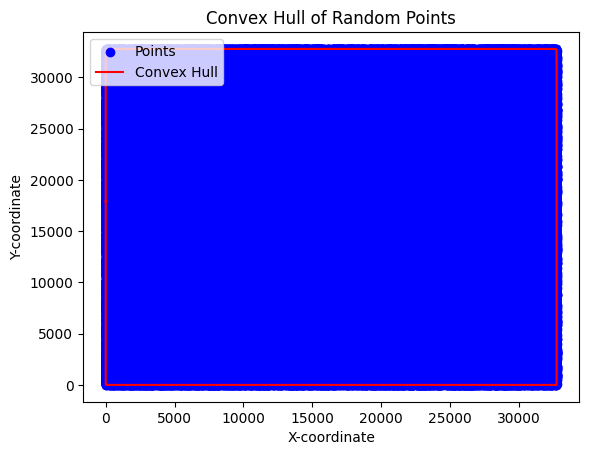

In [687]:
import matplotlib.pyplot as plt
import random
import math

class Point:
    """
    Represents a point in 2D space.
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return f"Point({self.x}, {self.y})"

# Generates a list of Points with random coordinates within specified ranges.
def generate_random_points(num_points, range_x, range_y):
    return [Point(random.uniform(0, range_x), random.uniform(0, range_y)) for _ in range(num_points)]

# Function to find the point with the smallest x-coordinate (and the smallest y in case of a tie)
def find_leftmost_point(points):
    leftmost_point = points[0]
    for point in points[1:]:
        if (point.x < leftmost_point.x) or (point.x == leftmost_point.x and point.y < leftmost_point.y):
            leftmost_point = point
    return leftmost_point

# Calculates the polar angle from base_point to point.
def polar_angle(base_point, point):
    if base_point == point:
        return -math.inf
    dy = point.y - base_point.y
    dx = point.x - base_point.x
    return math.atan2(dy, dx) if dx != 0 else (math.pi / 2 if dy > 0 else (3 * math.pi / 2))

#Calculates the square of the distance between base_point and point.
def distance(base_point, point):
    return (base_point.x - point.x) ** 2 + (base_point.y - point.y) ** 2

# Function to compute the cross product to determine the orientation of the turn

def ccw(p1, p2, p3):
    #Returns the cross product of vectors p1p2 and p1p3 (relative to p1).    
    return (p2.x - p1.x) * (p3.y - p1.y) - (p2.y - p1.y) * (p3.x - p1.x)

#Computes the convex hull of a set of 2D points using the Graham Scan algorithm.
def graham_scan(inputSet):
    '''
    Returns the list of points that lie on the convex hull (graham scan algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''
    
    # Step 1: Handle the edge case with fewer than 3 points
    if len(inputSet) < 3:
        # Convex hull is not defined for fewer than 3 points
        return sorted(inputSet, key= lambda p: p.x)

    # Remove duplicate points to avoid processing the same point twice
    unique_points = list(set(inputSet))

    # Step 2: Find the point with the smallest x-coordinate, or the smallest y-coordinate among ties
    P0 = find_leftmost_point(unique_points)
    
    # Step 3: Sort the points by the polar angle with P
    for point in unique_points:
        if polar_angle(P0, point) == 0:
            print(point)

    sorted_points = sorted(unique_points, key=lambda p: (polar_angle(P0, p), distance(P0, p)))

    # Step 4: Initialize the stack with the first two points
    outputSet = [sorted_points[0], sorted_points[1]]

    # Step 5: Process each point in the sorted array
    for point in sorted_points[2:]:
        # pop the last point from the stack if we turn clockwise to reach this point
        # Determine if we have a right turn or are collinear, and if so, pop from stack
        while len(outputSet) > 1 and ccw(outputSet[-2], outputSet[-1], point) <= 0:
            # A non-positive cross product means a right turn or collinear
            # The point is inside the hull and should be removed
            outputSet.pop()
        outputSet.append(point)
    

    # The stack now contains the points of the convex hull in counterclockwise order
    return outputSet


def plot_convex_hull(points, hull):
    """
    Plots the points and the convex hull.
    """
    plt.scatter([p.x for p in points], [p.y for p in points], color='blue', label='Points')
    hull.append(hull[0])  # Close the hull
    plt.plot([p.x for p in hull], [p.y for p in hull], color='red', label='Convex Hull')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.title('Convex Hull of Random Points')
    plt.legend()
    plt.show()

# Example usage
num_points = 700000
range_x, range_y = 32767, 32767
points = generate_random_points(num_points, range_x, range_y)
hull = graham_scan(points)
print(hull)
plot_convex_hull(points, hull)

Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

[Point(1, 1), Point(2, 2), Point(3, 3), Point(4, 4), Point(5, 5), Point(6, 6), Point(7, 7), Point(8, 8), Point(9, 9), Point(10, 10), Point(11, 11), Point(13, 13)]
[Point(1, 1), Point(13, 13)]


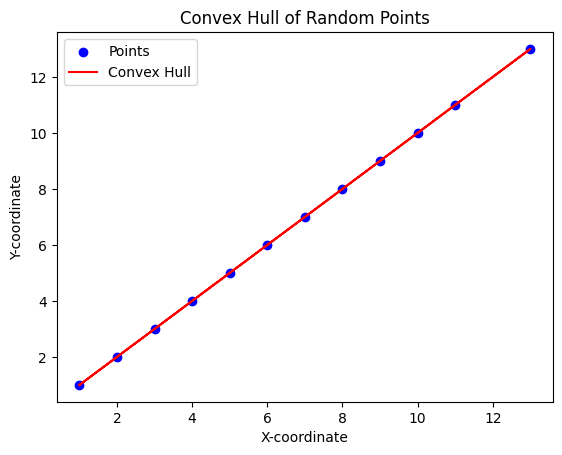

In [720]:

# function that finds the leftmost point in all the subhulls. return 2d list index and point index
def find_leftmost_in_subhulls(subhulls):
    leftmost = subhulls[0][0]
    subhull_index = 0
    for i, subhull in enumerate(subhulls):
        # will be at 0th index since graham returns sorted array of points for each subhull
        if subhull[0].x < leftmost.x:
            subhull_index = i
            leftmost = subhulls[i][0]

    
    return subhull_index

def find_polar_angle(p1, p2, p3):
    x1, y1 = p1.x, p1.y
    x2, y2 = p2.x, p2.y
    x3, y3 = p3.x, p3.y
    
    angle = math.atan2(y1-y2, x1-x2) - math.atan2(y3-y2, x3-x2)  

    # return the negative angle if in third or fourth quadrant 
    return angle

def find_orientation(p1, p2, p3):
    gradient_change = (p2.y - p1.y) * (p3.x - p2.x) - (p2.x - p1.x) * (p3.y - p2.y);
    if gradient_change == 0:
        return 0 
    return -1 if gradient_change > 0 else 1

def find_candidate(subhull, point):
    l= 0 
    r = len(subhull)
    prev_turn = find_orientation(point, subhull[0], subhull[-1])
    next_turn = find_orientation(point, subhull[0], subhull[(l+1) % len(subhull)])
    while l < r:
        mid = (l + r) // 2

        prev_mid = find_orientation(point, subhull[(mid-1) % len(subhull)], subhull[mid])
        mid_next = find_orientation(point, subhull[mid], subhull[(mid+1)%len(subhull)])
        mid_side = find_orientation(point, subhull[l], subhull[mid])

        if prev_mid == -1 and mid_next != -1:
            return mid
        elif (mid_side == 1 and (next_turn == -1 or prev_turn == next_turn)) or (mid_side == -1 and prev_mid == 1):
            r = mid
        else:
            l = mid + 1
            prev_turn = -mid_next
            
            if l < len(subhull):
                next_turn = find_orientation(point, subhull[l], subhull[(l+1) % len(subhull)])
            else:
                return -1
    return l

def find_next_point(subhulls, subhull_index, point_index):

    point = subhulls[subhull_index][point_index]
    next = (subhull_index, (point_index + 1) % len(subhulls[subhull_index]))
    for i, subhull in enumerate(subhulls):
        if i == subhull_index:
            continue
        candidate_index = find_candidate(subhull, point)
        q = subhulls[next[0]][next[1]]
        
        if candidate_index < len(subhull):
            r = subhull[candidate_index]
            t = find_orientation(point, q, r)

            if t == -1 or (t == 0 and distance(point, r) > distance(point, q)):
                next = (i, candidate_index)
    
    return next

def chen(inputSet):
    '''
    Returns the list of points that lie on the convex hull (chen's algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''    

    inputSet = list(set(inputSet))

    m = 3
    t = 1

    while True:
        outputSet = []
        m = min(2 ** (2**t), len(inputSet))
        subsets = []

        for i in range(0, len(inputSet), m):
            subsets.append(inputSet[i:m+i])

        subhulls = []
        for subset in subsets:
            subhulls.append(graham_scan(subset))

        leftmost_subhull_index = find_leftmost_in_subhulls(subhulls)
        on_hull = (leftmost_subhull_index, 0)
        outputSet.append(subhulls[on_hull[0]][on_hull[1]])

        for i in range(m):
            (subhull_index, point_index) = find_next_point(subhulls, on_hull[0], on_hull[1])
            on_hull = (subhull_index, point_index)
            if subhulls[subhull_index][point_index] == outputSet[0]:
                return outputSet
            outputSet.append(subhulls[subhull_index][point_index])
        
        t+=1 

        

num_points = 100000
range_x, range_y = 32767, 32767
# points = generate_random_points(num_points, range_x, range_y)
points = [Point(1,1), Point(2,2), Point(3,3), Point(4,4), Point(5,5), Point(6,6), Point(7,7), Point(8,8), Point(9,9), Point(10,10), Point(11,11), Point(13,13)]
print(points)
hull = chen(points)
print(hull)
plot_convex_hull(points, hull)

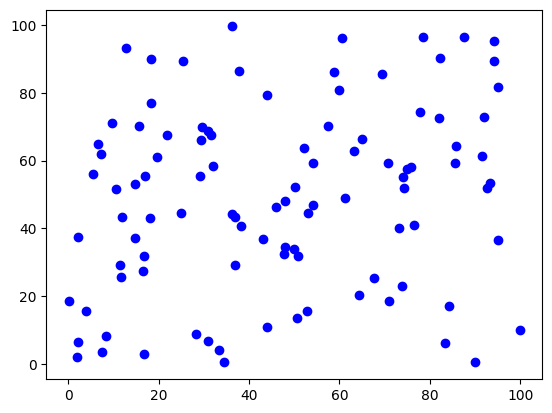

In [ ]:
# plot_convex_hull([Point(92.99303926481916, 99.73010412712048), Point(72.92537271767924, 27.705719425672747), Point(87.90551859812643, 4.593100360749358), Point(92.99303926481916, 99.73010412712048)], [])
# points = [Point(92.99303926481916, 99.73010412712048), Point(72.92537271767924, 27.705719425672747), Point(87.90551859812643, 4.593100360749358), Point(92.99303926481916, 99.73010412712048)] 
plt.scatter([p.x for p in points], [p.y for p in points], color='blue', label='Points')
#points = [Point(92.99303926481916, 99.73010412712048), Point(72.92537271767924, 27.705719425672747), Point(87.90551859812643, 4.593100360749358), Point(60.089205448746895, 44.372556053188674), Point(28.023464474263527, 43.61337685009109), Point(44.73041871064225, 71.26626501527615)]

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [ ]:
import random
import math

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return f"Point({self.x}, {self.y})"

class TestDataGenerator:
    """
    A class to represent a synthetic data generator for generating datasets
    to test convex hull algorithms.
    """
    
    def __init__(self, range_x, range_y):
        """
        Initializes the data generator with specified ranges for x and y coordinates.
        """
        self.range_x = range_x
        self.range_y = range_y

    def generate_random_points(self, num_points):
        """
        Generates a list of random 2D points within the specified ranges.
        """
        return [Point(random.uniform(0, self.range_x), random.uniform(0, self.range_y)) for _ in range(num_points)]

    def generate_worst_case_points(self, num_points, radius=None):
        """
        Generates points in a circular pattern, simulating a worst-case scenario.
        """
        if radius is None:
            radius = min(self.range_x, self.range_y) / 2 - 10
        return [Point(radius * math.cos(2 * math.pi / num_points * x) + self.range_x / 2,
                      radius * math.sin(2 * math.pi / num_points * x) + self.range_y / 2) for x in range(num_points)]

    def generate_hull_points(self, num_hull_points, num_inner_points):
        """
        Generates points with a specific number of points on the hull and additional inner points.
        """
        hull_points = self.generate_worst_case_points(num_hull_points)
        inner_points = self.generate_random_points(num_inner_points) if num_inner_points > 0 else []
        return hull_points + inner_points

# Example usage
generator = TestDataGenerator(100, 100)
random_points = generator.generate_random_points(50)
worst_case_points = generator.generate_worst_case_points(30)
specific_hull_points = generator.generate_hull_points(20, 30)

print("Random Points Sample:", random_points[:5])
print("Worst Case Points Sample:", worst_case_points[:5])
print("Specific Hull Points Sample:", specific_hull_points[:5])


Random Points Sample: [Point(94.55224092883964, 96.07044485677675), Point(29.490898435629433, 83.32351140581909), Point(23.07408805161645, 22.366524171078684), Point(62.027882790659305, 3.429320371137423), Point(53.15225110584605, 59.50483845776018)]
Worst Case Points Sample: [Point(90.0, 50.0), Point(89.12590402935223, 58.31646763271037), Point(86.54181830570403, 66.269465723032), Point(82.36067977499789, 73.51141009169893), Point(76.76522425435434, 79.72579301909576)]
Specific Hull Points Sample: [Point(90.0, 50.0), Point(88.04226065180615, 62.3606797749979), Point(82.36067977499789, 73.51141009169893), Point(73.51141009169893, 82.36067977499789), Point(62.3606797749979, 88.04226065180615)]


Use the cell below to implement the requested **experimental framework** API.

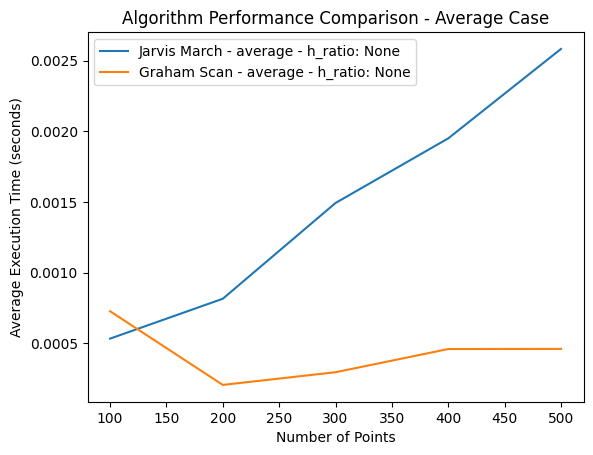

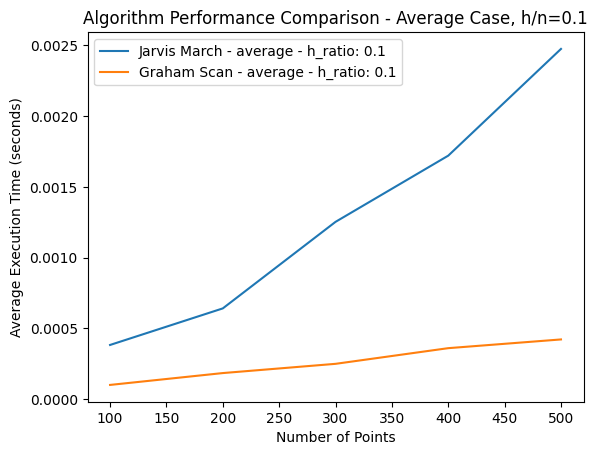

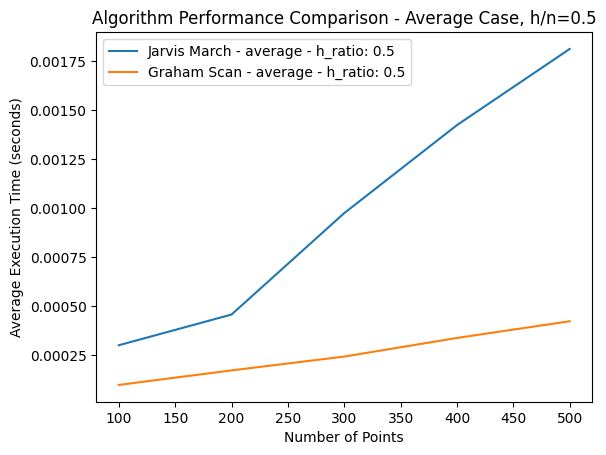

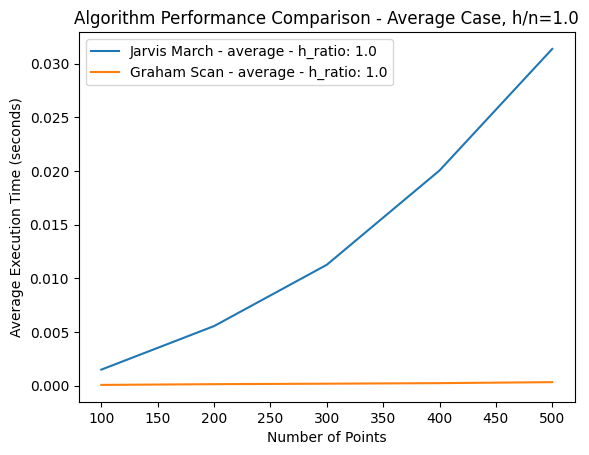

<Figure size 640x480 with 0 Axes>

In [ ]:
import timeit
import matplotlib.pyplot as plt

class ExperimentalFramework:
    """
    A framework for experimenting with and evaluating the performance of different
    convex hull algorithms.
    """
    
    def __init__(self, algorithms):
        """
        Initializes the experimental framework with a list of algorithms to test.

        Parameters:
        - algorithms: A list of tuples, each containing the algorithm function and its name as a string.
        """
        self.algorithms = algorithms
        self.generator = TestDataGenerator(100, 100)  # Setup with default range, adjust as needed

    def run_experiment(self, num_points, scenario='average', num_runs=3, hull_ratio=None):
        """
        Includes scenario specification and the option to specify a hull ratio for tests that require a specific number of hull points.
    
        Parameters:
        - scenario: 'average' for average-case scenarios, 'worst' for worst-case scenarios.
        - hull_ratio: Optional float indicating the ratio of hull points to total points.
        """
        results = {}
        for algo, name in self.algorithms:
            times = []
            for _ in range(num_runs):
                if scenario == 'worst':
                    points = self.generator.generate_worst_case_points(num_points)
                elif hull_ratio is not None:
                    num_hull_points = int(num_points * hull_ratio)
                    points = self.generator.generate_hull_points(num_hull_points, num_points - num_hull_points)
                else:
                    points = self.generator.generate_random_points(num_points)
                start_time = timeit.default_timer()
                algo(points)
                times.append(timeit.default_timer() - start_time)
            avg_time = sum(times) / num_runs
            results[name] = avg_time
        return results


    def compare_algorithms(self, point_ranges, scenarios=['average', 'worst'], hull_ratios=[None, 0.5, 1.0], num_runs=3):
        """
        Compare algorithms over different scenarios and hull ratios.

        Parameters:
        - scenarios: List of scenarios to test ('average', 'worst').
        - hull_ratios: List of hull ratios to test (None for random, other values for specific ratios of h to n).
        """
        for scenario in scenarios:
            for hull_ratio in hull_ratios:
                all_results = {name: [] for _, name in self.algorithms}
                for num_points in point_ranges:
                    results = self.run_experiment(num_points, scenario, num_runs, hull_ratio=hull_ratio)
                    for name in results:
                        all_results[name].append(results[name])

                # Plotting
                for name in all_results:
                    plt.plot(point_ranges, all_results[name], label=f'{name} - {scenario} - h_ratio: {hull_ratio}')
            
                plt.xlabel('Number of Points')
                plt.ylabel('Average Execution Time (seconds)')
                title_suffix = f" - {scenario.capitalize()} Case" + (f", h/n={hull_ratio}" if hull_ratio is not None else "")
                plt.title(f'Algorithm Performance Comparison{title_suffix}')
                plt.legend()
                plt.figure()


# Example usage


framework = ExperimentalFramework([
    (jarvismarch, "Jarvis March"),
    (graham_scan, "Graham Scan")
])

# Compare algorithms across a range of points and hull ratio

# Example hull ratios: None for completely random, 0.1 for 10% of points on the hull, 
# 0.5 for half of the points on the hull, and 1.0 for all points on the hull (worst-case).
hull_ratios = [None, 0.1, 0.5, 1.0]

# Define the range of point counts you want to test.
point_ranges = [100, 200, 300, 400, 500]

# Execute the comparison.

#for a standard set of tests
#framework.compare_algorithms(point_ranges)

#to generate plots for each scenario and hull ratio combination specified
framework.compare_algorithms(point_ranges, scenarios=['average'], hull_ratios=hull_ratios)


Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

In [ ]:
# ADD YOUR TEST CODE HERE 



